# Rec P1

## Emanuel Staub Araldi

In [3]:
import DSP
import numpy as np
import scipy.signal as sp
import matplotlib.pyplot as plt


# 1)

## Provando que o sistema é linear

$$
y[n] = x[n]\cdot cos(n\pi/2)  \\~\\
x_1[n] = \alpha \cdot x[n] \\~\\
y_1[n] = x_1[n] \cdot cos(n\pi/2) \\~\\
y_1[n] = \alpha \cdot x \cdot cos(n\pi/2) = \alpha \cdot y[n]\\~\\
$$

$$
x[n] = x_1[n] + x_2[n] \\~\\
y[n] = x[n] \cdot cos(n\pi/2) \\~\\
y[n] = (x_1[n] + x_2[n]) \cdot cos(n\pi/2) \\~\\
y[n] = y_1[n] + y_2[n] \\~\\
$$

## Provando que o sistema não é invariante no tempo

$$
y[n] = x[n] \cdot cos(n\pi/2) \\~\\
x_1[n] = x[n-\tau] \\~\\
y_1[n] = x_1[n] \cdot cos(n\pi/2) \\~\\
y_1[n] = x[n-\tau] \cdot cos(n\pi/2) \ne y[n-\tau] \\~\\
$$

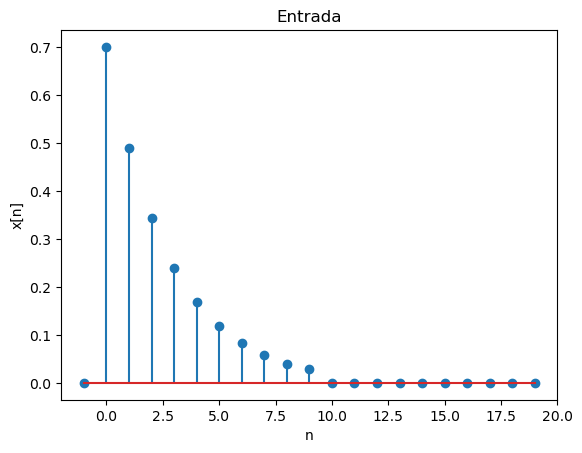

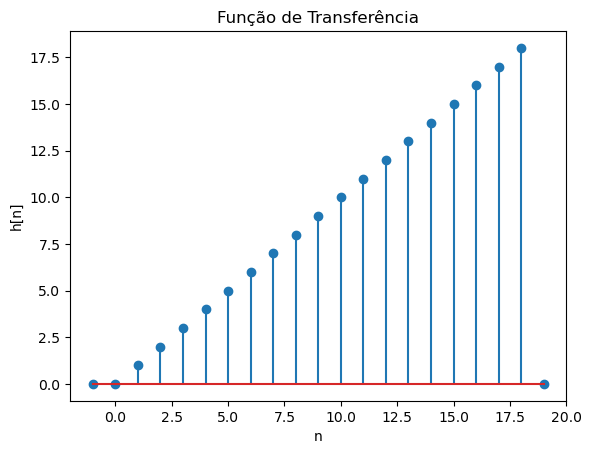

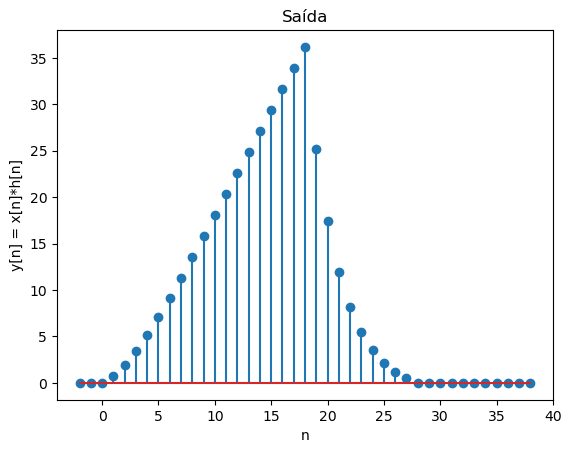

In [5]:
n = np.arange(-1, 20)
##
x = 0.7**(n+1)*(np.heaviside(n, 1) - np.heaviside(n-10, 1))
DSP.plot([x, n], "Entrada", yl="x[n]")
##
h = n*(np.heaviside(n, 1) - np.heaviside(n-19, 1))
DSP.plot([h, n], "Função de Transferência", yl="h[n]")
##
[y, ny] = DSP.conv_m(x, n, h, n)
DSP.plot([y, ny], "Saída", yl="y[n] = x[n]*h[n]")

# 3)

## Ganho para H(0), $s=e^{-jw}=1$

$$
b = [1, -0.5] \\~\\
a = [1, 0.25, 0.5] \\~\\
H(s) = \dfrac{Y}{X} = \dfrac{b}{a} = \dfrac{s^{-2}-0.5s^{-1}}{s^{-2}+0.25s^{-1}+0.5} \\~\\
H(0) = \dfrac{0.5}{1.75} \approx 0.286
$$

Possui ganho unitário para $\omega = 0$

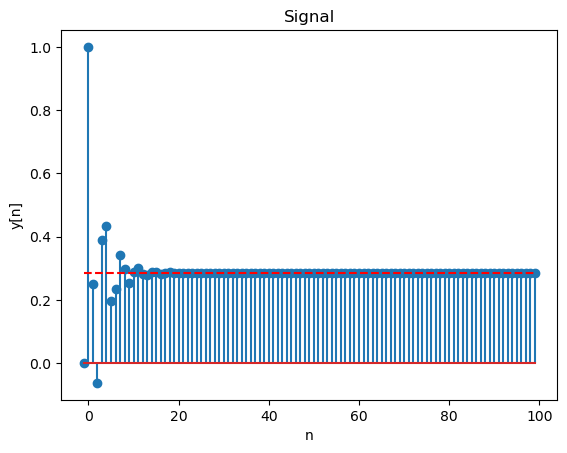

In [16]:
n = np.arange(-1, 100)
x = np.heaviside(n, 1)
##
b = [1, -0.5]
a = [1, 0.25, 0.5]
y = sp.lfilter(b, a, x)
DSP.plot([y, n])
assintota = np.ones(len(n))*(0.5/1.75)
plt.plot(n, assintota, 'r--')

Comparando os dois resultados, observamos que o cálculo de ganho algébicro prevê com exatidão o valor *steady state* do sistema

# 4)

$$
h[n] = n \cdot (0.7)^n \cdot u[n] \\~\\
h[n] = (((n+1) \cdot 0.7^n) - 0.7^n) \cdot u[n] \\~\\
H(jw) = \dfrac{1}{(1-0.7e^{-jw})^2} - \dfrac{1}{1-0.7e^{-jw}} \\~\\
H(jw) = \dfrac{1}{(1-0.7e^{-jw})} \cdot (\dfrac{1}{1-0.7e^{-jw}} - 1) \\~\\
$$

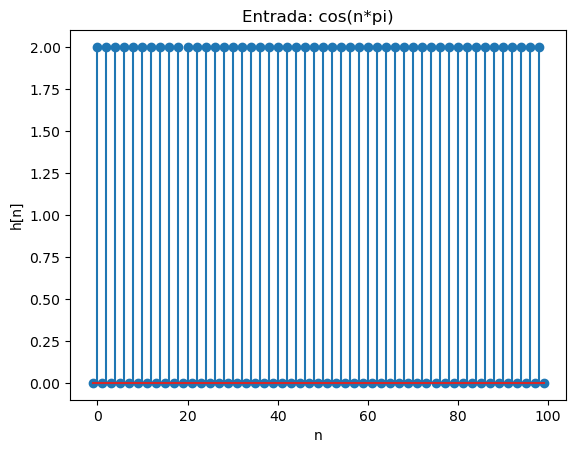

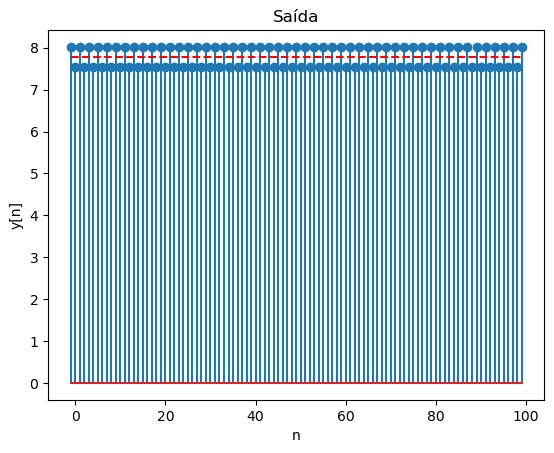

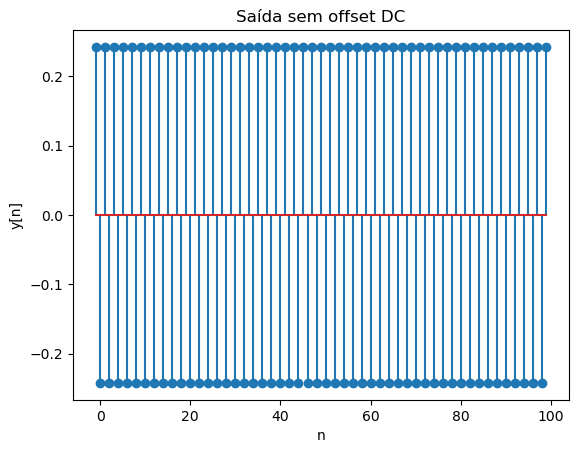

In [68]:
n = np.arange(-1, 100)
j = complex(0, 1)
##
x = np.cos(n*np.pi)+1
DSP.plot([x, n], "Entrada: cos(n*pi)", yl="h[n]", xl="n")
## Offset DC
w0 = 0
H_DC = (1/0.3)*(1/0.3 -1)
y0 = H_DC
## Resposta à w=pi
w1 = np.pi
H1 = (1/(1-0.7*np.exp(-j*w1)))*((1/(1-0.7*np.exp(-j*w1))) - 1)
y1 = np.abs(H1)*np.cos(n*np.pi + np.angle(H1))
##
y = y0+y1
DSP.plot([y, n], "Saída")
dc_offset = np.ones(len(n))*y0
plt.plot(n, dc_offset, 'r--')
DSP.plot([y1, n], "Saída sem offset DC")